<a href="https://colab.research.google.com/github/Yashu2699/Deep_learning/blob/main/Semantic_seg/unet_electron_microscopy_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.utils import normalize
import os
import cv2
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [2]:
!pip install opencv-contrib-python

In [3]:
image_directory = '/content/drive/MyDrive/Colab Notebooks/deep learning /Object_Segmentation/images/'
mask_directory = '/content/drive/MyDrive/Colab Notebooks/deep learning /Object_Segmentation/masks/'

In [4]:
image_directory

'/content/drive/MyDrive/Colab Notebooks/deep learning /Object_Segmentation/images/'

In [5]:
size = 256
image_dataset = []
mask_dataset = []

images = sorted(os.listdir(image_directory))
for i, image_name in enumerate(images):
  if (image_name.split('.')[1] == 'tif'):
    image = cv2.imread(image_directory + image_name, 0)
    image = Image.fromarray(image)
    image = image.resize((size, size))
    image_dataset.append(np.array(image))

masks = sorted(os.listdir(mask_directory))
for i, mask_name in enumerate(masks):
  if (mask_name.split('.')[1] == 'tif'):
    image = cv2.imread(mask_directory + mask_name, 0)
    image = Image.fromarray(image)
    image = image.resize((size, size))
    mask_dataset.append(np.array(image))

In [6]:
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1), 3)
mask_dataset = np.expand_dims(np.array(mask_dataset), 3) / 255

In [7]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

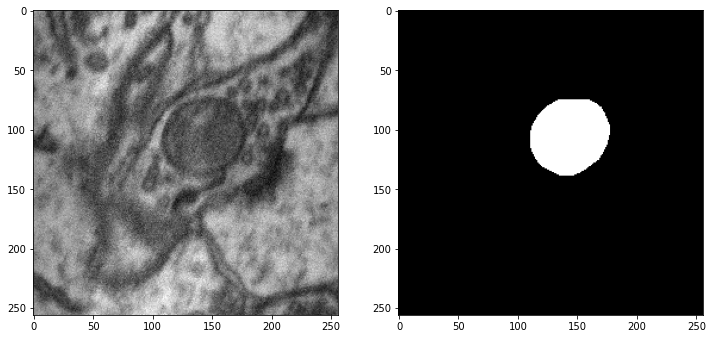

In [8]:
idx = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[idx], (256, 256)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[idx], (256, 256)), cmap='gray')
plt.show()

In [9]:
from google.colab import files

files.upload()

Saving unet.py to unet.py


{'unet.py': b'# -*- coding: utf-8 -*-\n"""UNET\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1I_HfLG9bxK6dUy48IOz7U4va_nK27WHh\n"""\n\nfrom keras.models import Model\nfrom keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda\n\n\ndef simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):\n    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))\n    s = inputs\n\n    c1 = Conv2D(16, (3, 3), activation=\'relu\', kernel_initializer=\'he_normal\', padding=\'same\')(s)\n    c1 = Dropout(0.1)(c1)\n    c1 = Conv2D(16, (3, 3), activation=\'relu\', kernel_initializer=\'he_normal\', padding=\'same\')(c1)\n    p1 = MaxPooling2D((2, 2))(c1)\n    \n    c2 = Conv2D(32, (3, 3), activation=\'relu\', kernel_initializer=\'he_normal\', padding=\'same\')(p1)\n    c2 = Dropout(0.1)(c2)\n    c2 = Conv2D(32, (3, 3), activation=\'relu\', kernel_initializer=\'

In [10]:
img_height = image_dataset.shape[1]
img_width = image_dataset.shape[2]
img_channels = image_dataset.shape[3]
import unet 
from unet import simple_unet_model
def get_model():
  return simple_unet_model(img_height, img_width, img_channels)


model = get_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [11]:
checkpointer = ModelCheckpoint('microscopy_unet.h5', verbose=1, save_best_only=True)
earlystopping = EarlyStopping(patience=3, monitor='val_loss')
tensorboard = TensorBoard(log_dir='logs')

callbacks = [checkpointer, earlystopping, tensorboard]

In [12]:
history = model.fit(X_train, y_train, batch_size=16, verbose=1, epochs=50, 
                    validation_data=(X_test, y_test), shuffle=False, callbacks=callbacks)

model.save('microscopy_unet.hdf5')

Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 0.1870 - accuracy: 0.9404
Epoch 1: val_loss improved from inf to 0.17596, saving model to microscopy_unet.h5
112/112 [==============================] - 33s 166ms/step - loss: 0.1870 - accuracy: 0.9404 - val_loss: 0.1760 - val_accuracy: 0.9457
Epoch 2/50
112/112 [==============================] - ETA: 0s - loss: 0.0801 - accuracy: 0.9636
Epoch 2: val_loss improved from 0.17596 to 0.15203, saving model to microscopy_unet.h5
112/112 [==============================] - 16s 147ms/step - loss: 0.0801 - accuracy: 0.9636 - val_loss: 0.1520 - val_accuracy: 0.9372
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9836
Epoch 3: val_loss improved from 0.15203 to 0.07001, saving model to microscopy_unet.h5
112/112 [==============================] - 17s 148ms/step - loss: 0.0423 - accuracy: 0.9836 - val_loss: 0.0700 - val_accuracy: 0.9727
Epoch 4/50
112/112 [==============================] -

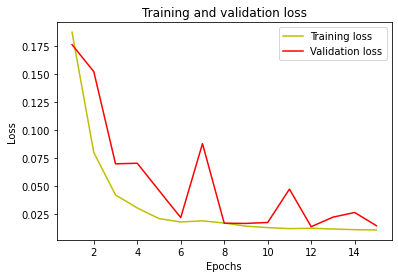

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

IoU socre is:  0.9033722699967194


In [15]:
model = get_model()
model.load_weights('microscopy_unet.hdf5')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_9 (Dropout)            (None, 256, 256, 16  0           ['conv2d_19[0][0]']              
                                )                                                           

In [29]:
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.2).astype(np.uint8)

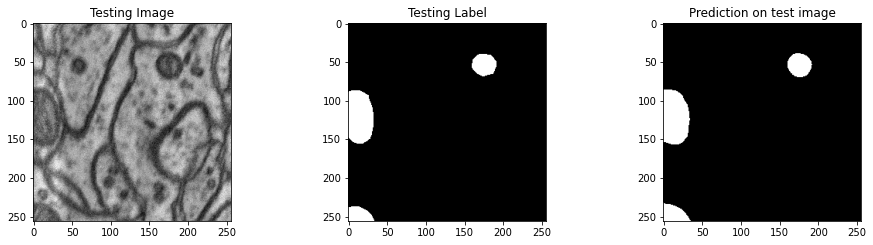

In [30]:
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')